In [16]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
import numpy as np
import keras
import os
import cv2
from PIL import Image
import numpy as np
from google.colab import drive
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, GlobalAveragePooling2D, Input, InputLayer, BatchNormalization
drive.mount("/content/drive")
from matplotlib import pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
labels_path = "/content/drive/My Drive/ИАД/LR2/Temp/labels.npy"
cells_path = "/content/drive/My Drive/ИАД/LR2/Temp/Cells.npy"

Cells=np.load(cells_path)
labels=np.load("/content/drive/My Drive/ИАД/LR2/Temp/labels_final.npy")

s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

num_classes=len(np.unique(labels))
len_data=len(Cells)
print(num_classes)
print(len_data)

2
27560


In [18]:
(x_train,x_test)=Cells[(int)(0.2*len_data):],Cells[:(int)(0.2*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)
(y_train,y_test)=labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [10]:
print(x_train.shape)
print(x_train[0].shape)

(22048, 50, 50, 3)
(50, 50, 3)


In [15]:
model = Sequential()
model.add(InputLayer(input_shape=(50,50,3)))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add()
model.add
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_model = MobileNet(weights=None, include_top=False,input_shape=(50, 50, 3)) 

x = base_model.output

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a logistic layer
predictions = Dense(2, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# Compile model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',
                           metrics = ['accuracy', 'mae'])
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 51, 51, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 25, 25, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 25, 25, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 25, 25, 32)      

In [ ]:
history = model.fit(x_train,y_train,batch_size=50,epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20


ValueError: ignored

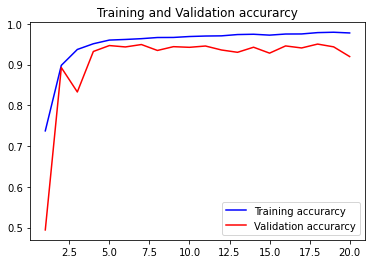

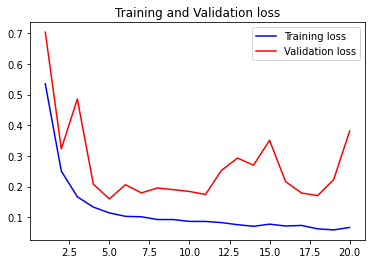

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model
model.save('/content/drive/My Drive/ИАД/LR2/cells_new.h5')

1/1 [==============================] - 0s 1ms/step
0
Uninfected 
Accuracy =  0.99999976


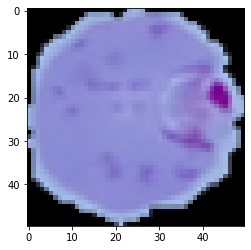

In [ ]:
import os
from keras.models import load_model
def convert_to_array(img):
    im = cv2.imread(img)
    img_ = Image.fromarray(im, 'RGB')
    image = img_.resize((50, 50))
    return np.array(image)

def get_cell_name(label):
    if label==1:
        return "Paracitized"
    if label==0:
        return "Uninfected"

model = load_model('/content/drive/My Drive/ИАД/LR2/cells_new.h5')
# 98 - par, 50 - un
PICTURE_NUMBER = 151
img = plt.imshow(x_test[PICTURE_NUMBER], cmap=plt.get_cmap('gray'))
img = img.get_figure()
img.savefig("/content/drive/My Drive/ИАД/test1.png")
PATH = "/content/drive/My Drive/ИАД/test1.png"
ar=convert_to_array(PATH)
os.remove(PATH)
ar=ar/255
label=1
a=[]
a.append(ar)
a=np.array(a)
score=model.predict(a,verbose=1)
label_index=np.argmax(score)
print(label_index)
acc=np.max(score)
Cell=get_cell_name(label_index)
print(Cell,"\nAccuracy =  "+ str(acc))